<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [1]:
student_number = '99109788'
first_name = 'Mobina'
last_name = 'Salimipanah'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Prepfocessing

Import your needed libraries in following cell.

In [2]:
pip install cvxopt

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from cvxopt import matrix, solvers
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score


Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable.

In [4]:
data = pd.read_csv('satimage.csv')

features = data.drop('label', axis=1)
labels = data['label']

print(features.head())
print(labels.unique())

      0         1         2         3         4         5          6       7  \
0   7.5  6.272730  4.047619  3.975208  3.032258  4.545455   8.421050  1.8125   
1   7.5  4.090909 -0.714290  1.776858  2.903226  3.090909   5.052630 -1.7500   
2  12.0  9.909090  8.333330  5.479339  3.354839  7.272730  10.526316  2.7500   
3   7.5  4.818182  1.190480  2.702482  2.774194  2.363640   5.894740 -0.2500   
4   7.5  4.818182  2.142860  2.702482  3.032258  3.090909   6.736840 -1.0000   

        8         9  ...        26        27        28        29        30  \
0 -2.2500  0.077672  ... -0.517241 -0.600000 -0.138462 -0.188119 -0.431579   
1 -2.2500  0.077672  ... -0.517241 -0.600000 -0.015385 -0.049505 -0.431579   
2  3.4375  6.368924  ...  0.103448 -0.233333  0.200000  0.207921 -0.010526   
3 -3.8750 -2.368924  ... -0.011494 -0.383333 -0.138462 -0.049505 -0.347368   
4 -0.6250 -1.320388  ...  0.287356 -0.183333  0.230769  0.267327 -0.031579   

         31       32        33        34        35

Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.625, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [6]:
print("Scaled Training Features Head:")
print(X_train_scaled[:5])
print("Scaled Validation Features Head:")
print(X_val_scaled[:5])
print("Scaled Test Features Head:")
print(X_test_scaled[:5])

Scaled Training Features Head:
[[ 0.7863765   0.50846857  0.05546167 -0.07305507  0.1468204  -0.1826781
  -0.47924665 -0.4408269  -0.05654008 -0.51712078 -0.94484585 -0.8067873
   0.72565221  0.51793051 -0.18376881 -0.18072509  0.45408051  0.17356428
  -0.35462971 -0.17655427  0.17017663 -0.34527655 -0.8247253  -0.59556612
   0.3684192   0.16471335 -0.41972768 -0.23293861  0.38741012  0.35448991
   0.06901122 -0.07187556  0.70555089  0.58492268 -0.16323701 -0.06827516]
 [-0.16773396 -0.37695129 -1.51198998 -1.29870894 -0.14842563 -0.00624886
  -1.32237859 -1.28603244  0.16583809 -0.34167251 -1.30387719 -1.27874992
   0.06389242 -0.36861255 -1.1430796  -1.24005274 -0.21355272 -0.35737115
  -1.37357371 -1.22900346 -0.20285214 -0.34527655 -0.88451304 -1.0160426
  -0.14707395 -0.27849443 -1.02322482 -1.18583133 -0.13351304 -0.26590703
  -1.42757354 -1.17707979 -0.41903917 -0.43440417 -1.00182552 -1.33032378]
 [ 0.41941094  0.15430038 -0.36654513 -0.39278932 -0.44367394 -1.10893202
   0.303

We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [7]:
binary_data = data[data['label'].isin([4, 6])]

binary_data['label'] = binary_data['label'].map({4: 1, 6: -1})

binary_features = binary_data.drop('label', axis=1)
binary_labels = binary_data['label']
print(binary_labels.unique())

B_X_train, B_X_temp, B_y_train, B_y_temp = train_test_split(binary_features, binary_labels, test_size=0.40, random_state=42)
B_X_val, B_X_test, B_y_val, B_y_test = train_test_split(B_X_temp, B_y_temp, test_size=0.625, random_state=42)

scaler = StandardScaler()

scaler.fit(B_X_train)

B_X_train_scaled = scaler.transform(B_X_train)
B_X_val_scaled = scaler.transform(B_X_val)
B_X_test_scaled = scaler.transform(B_X_test)


[-1  1]


<ipython-input-7-6c8cc85f398b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data['label'] = binary_data['label'].map({4: 1, 6: -1})


In [8]:
print("Scaled Training Features Head:")
print(B_X_train_scaled[:5])
print("Training Labels Head:")
print(B_y_train.head())
print("Scaled Validation Features Head:")
print(B_X_val_scaled[:5])
print("Validation Labels Head:")
print(B_y_val.head())
print("Scaled Test Features Head:")
print(B_X_test_scaled[:5])
print("Test Labels Head:")
print(B_y_test.head())


Scaled Training Features Head:
[[ 1.84187234  2.29102804  1.4541042   1.18005649  1.96917298  2.0132485
   2.25841562  1.74568209  2.01376517  2.01147115  1.5818142   1.69051948
   2.90629391  2.48090112  2.1236682   2.43641786  1.68888356  2.61805115
   2.60150457  2.10180019  1.70750328  2.12679118  1.74465927  2.02846467
   2.39721817  2.99554894  2.41788449  1.9588818   1.9024101   2.70525345
   2.44647215  1.94764811  1.93811236  2.25361653  2.08584493  1.88941133]
 [ 0.39855296  0.50270145  0.2446575  -0.08728425  0.44576764  0.5682089
   0.55780386 -0.04526757  0.49190303  0.85984166  0.58770883  0.37003672
   0.33294897  0.20336228  0.23640141  0.12461715  0.35161374  0.22881232
  -0.1035536  -0.30005397  0.38289496  0.65506962  0.63271104  0.14747127
   0.06609839  0.30833204 -0.03580491 -0.00784223  0.64461982  0.32518609
   0.32090915 -0.01338534  0.67419759  0.3530373   0.32127447 -0.03384681]
 [-0.65113385 -0.85983331 -1.48312714 -1.4521132  -0.66216039 -0.8768307
  -1.500

In [9]:
svm_model = SVC(kernel='linear')
svm_model.fit(B_X_train_scaled, B_y_train)

SVC(kernel='linear')

# Model (50 points)

Here is soft margin svm convex optimization formulation.
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

<font color='blue'>
Here is the dual formulation of the soft margin SVM convex optimization:

$$
\begin{aligned}
\text{Maximize} & \quad W(\boldsymbol{\alpha}) = \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j \\
\text{Subject to} & \quad 0 \leq \alpha_i \leq C, \quad i=1, 2, \ldots, N \\
& \quad \sum_{i=1}^N \alpha_i y_i = 0
\end{aligned}
$$
</font>


Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


In [10]:
def soft_margin_svm(X, y, C):
    n_samples, n_features = X.shape

    print(n_samples)

    K = np.dot(X, X.T)
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    G = matrix(np.vstack([np.eye(n_samples) * -1, np.eye(n_samples)]))
    h = matrix(np.hstack([np.zeros(n_samples), np.ones(n_samples) * C]))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    solvers.options['show_progress'] = True
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(solution['x'])

    sv = alphas > 1e-5
    support_vectors = X[sv]
    support_vector_labels = y[sv]
    support_vector_alphas = alphas[sv]

    w = np.sum(support_vector_alphas[:, np.newaxis] * support_vector_labels[:, np.newaxis] * support_vectors, axis=0)

    return w, support_vectors, support_vector_labels, support_vector_alphas


In [11]:
if isinstance(B_X_train_scaled, pd.DataFrame):
    B_X_train_scaled = B_X_train_scaled.values

if isinstance(B_y_train, pd.Series):
    B_y_train = B_y_train.values


In [12]:
C = 1.0
w, support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(B_X_train_scaled, B_y_train, C)

1280
     pcost       dcost       gap    pres   dres
 0: -6.0440e+02 -3.5442e+03  2e+04  3e+00  6e-13
 1: -4.1034e+02 -2.4173e+03  4e+03  4e-01  5e-13
 2: -3.7857e+02 -8.3311e+02  6e+02  4e-02  3e-13
 3: -4.2148e+02 -5.5571e+02  1e+02  1e-02  3e-13
 4: -4.4208e+02 -5.1226e+02  8e+01  4e-03  3e-13
 5: -4.5199e+02 -4.9374e+02  4e+01  2e-03  2e-13
 6: -4.5867e+02 -4.8119e+02  2e+01  1e-03  3e-13
 7: -4.6351e+02 -4.7242e+02  9e+00  3e-04  3e-13
 8: -4.6575e+02 -4.6871e+02  3e+00  2e-05  3e-13
 9: -4.6665e+02 -4.6761e+02  1e+00  3e-06  3e-13
10: -4.6697e+02 -4.6725e+02  3e-01  7e-07  3e-13
11: -4.6709e+02 -4.6711e+02  2e-02  2e-09  4e-13
12: -4.6710e+02 -4.6710e+02  2e-03  1e-10  4e-13
13: -4.6710e+02 -4.6710e+02  2e-05  1e-12  3e-13
Optimal solution found.


In [13]:
print("Alpha data type:", support_vector_alphas.dtype)
print("Label data type:", support_vector_labels.dtype)
print("x_test data type:", B_X_test.values.dtype)
print("Support vectors data type:", support_vectors.dtype)

Alpha data type: float64
Label data type: int64
x_test data type: float64
Support vectors data type: float64


In [14]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    output:
        y_pred: predictoin labels
    """
    y_pred = []

    for x in x_test:
        decision = 0
        for alpha, sv_label, sv in zip(support_vector_alphas, support_vector_labels, support_vectors):
            decision += alpha * sv_label * np.dot(sv, x)

        y_pred.append(np.sign(decision))

    return np.array(y_pred)

In [15]:
y_pred = predict_labels(np.array(B_X_test_scaled), support_vectors, support_vector_labels, support_vector_alphas)

In [16]:
y_pred

array([-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
        1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
        1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
       -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [17]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    # TODO: Write your code here

    accuracy = accuracy_score(B_y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(B_y_test, y_pred)
    confusion_mat = confusion_matrix(B_y_test, y_pred)


    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat


_, _, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.7883895131086143
Balanced Accuracy:  0.827831184848536
Confusion Matrix:
 [[276 101]
 [ 12 145]]


<Axes: >

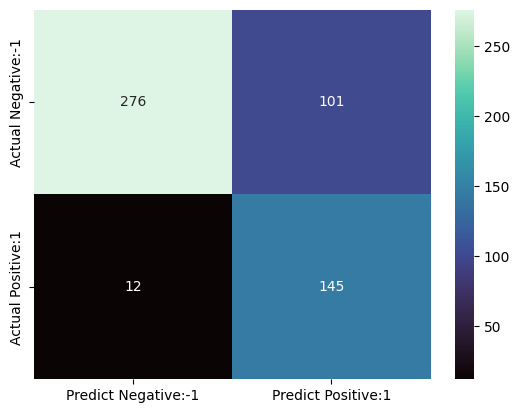

In [18]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [19]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:

        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    distance_squared = np.sum((x1 - x2) ** 2)
    output = np.exp(-gamma * distance_squared)
    return output

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    # TODO: Write your code here

    n_samples, n_features = X.shape

    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf(X[i], X[j], gamma)

    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones((n_samples, 1)))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    solvers.options['show_progress'] = True
    print(f"Solving with gamma = {gamma}")

    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x']).flatten()

    support_vector_indices = alphas > 1e-5
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    support_vector_alphas = alphas[support_vector_indices]

    return support_vectors, support_vector_labels, support_vector_alphas

In [20]:
B_X_val_scaled = B_X_val_scaled.values if isinstance(B_X_val_scaled, pd.DataFrame) else B_X_val_scaled
B_y_val = B_y_val.values if isinstance(B_y_val, pd.Series) else B_y_val

In [21]:
def svm_predict(X, support_vectors, support_vector_labels, support_vector_alphas, gamma):
    """
    Predict using the trained SVM model with RBF kernel.
    """
    y_predict = np.zeros(len(X))
    for i in range(len(X)):
        sum_alpha_y_k = 0
        for alpha, sv_y, sv in zip(support_vector_alphas, support_vector_labels, support_vectors):
            sum_alpha_y_k += alpha * sv_y * rbf(X[i], sv, gamma)
        y_predict[i] = np.sign(sum_alpha_y_k)
    return y_predict

In [22]:
def calculate_balanced_accuracy(y_true, y_pred):
    """
    Calculate balanced accuracy.
    """
    unique_labels = np.unique(y_true)
    accuracies = []
    for label in unique_labels:
        tp = np.sum((y_pred == label) & (y_true == label))
        actual_positives = np.sum(y_true == label)
        accuracies.append(tp / actual_positives if actual_positives != 0 else 0)
    return np.mean(accuracies)


In [23]:
gammas = [0.001, 0.01, 1, 10, 100]
best_balanced_accuracy = -1
# TODO: Write your code here
for gamma in gammas:
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(B_X_train_scaled, B_y_train, C, gamma)
    y_pred_val = svm_predict(B_X_val_scaled, support_vectors, support_vector_labels, support_vector_alphas, gamma)
    balanced_acc = calculate_balanced_accuracy(B_y_val, y_pred_val)
    if balanced_acc > best_balanced_accuracy:
        best_balanced_accuracy = balanced_acc
        best_gamma = gamma
        best_support_vectors = support_vectors
        best_support_vector_labels = support_vector_labels
        best_support_vector_alphas = support_vector_alphas

print('best gamma =',best_gamma)

Solving with gamma = 0.001
     pcost       dcost       gap    pres   dres
 0: -6.3611e+02 -3.2584e+03  2e+04  3e+00  2e-14
 1: -4.3911e+02 -2.1372e+03  2e+03  2e-01  2e-14
 2: -4.6449e+02 -7.3113e+02  3e+02  2e-02  1e-14
 3: -5.1974e+02 -6.3067e+02  1e+02  7e-03  1e-14
 4: -5.4375e+02 -5.9417e+02  5e+01  3e-03  1e-14
 5: -5.5304e+02 -5.8068e+02  3e+01  1e-03  1e-14
 6: -5.5950e+02 -5.7130e+02  1e+01  4e-04  1e-14
 7: -5.6140e+02 -5.6867e+02  7e+00  2e-04  1e-14
 8: -5.6357e+02 -5.6588e+02  2e+00  5e-05  1e-14
 9: -5.6439e+02 -5.6486e+02  5e-01  9e-06  1e-14
10: -5.6458e+02 -5.6462e+02  4e-02  6e-07  2e-14
11: -5.6460e+02 -5.6460e+02  7e-04  7e-09  2e-14
12: -5.6460e+02 -5.6460e+02  8e-06  8e-11  2e-14
Optimal solution found.
Solving with gamma = 0.01
     pcost       dcost       gap    pres   dres
 0: -4.7409e+02 -3.2458e+03  2e+04  3e+00  1e-14
 1: -3.3672e+02 -2.0731e+03  2e+03  2e-01  9e-15
 2: -3.5090e+02 -6.6032e+02  3e+02  2e-02  7e-15
 3: -3.9484e+02 -5.1809e+02  1e+02  6e-03  

In [24]:
y_pred = predict_labels(np.array(B_X_test_scaled), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(B_y_test, y_pred)

Accuracy:  0.8033707865168539
Balanced Accuracy:  0.8291489972799
Confusion Matrix:
 [[289  88]
 [ 17 140]]


# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.8931044182448676
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99       355
         2.0       0.97      0.97      0.97       189
         3.0       0.88      0.94      0.91       342
         4.0       0.68      0.61      0.64       155
         5.0       0.93      0.94      0.93       185
         6.0       0.91      0.89      0.90       383

    accuracy                           0.91      1609
   macro avg       0.89      0.89      0.89      1609
weighted avg       0.91      0.91      0.91      1609

Balanced Accuracy: 0.8880046622293033


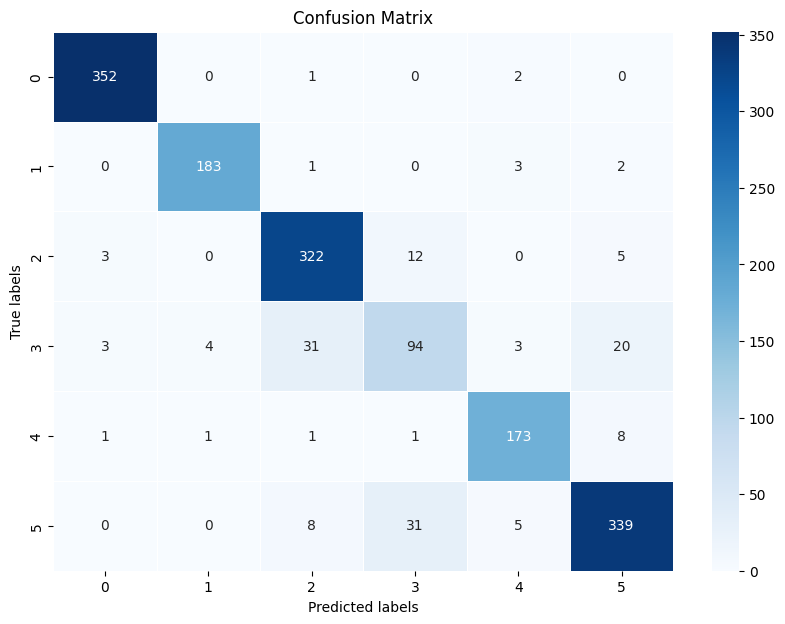

In [25]:

parameter_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
svm = SVC(kernel='rbf')

grid_search = GridSearchCV(estimator=svm, param_grid=parameter_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

y_pred = grid_search.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Implement Multiclass SVM from scratch without using ready functions (optional).

In [26]:

def rbf_kernel(X1, X2, gamma):
    if X1.ndim == 1:
        X1 = X1[np.newaxis, :]
    if X2.ndim == 1:
        X2 = X2[np.newaxis, :]
    dist_sq = np.sum((X1[:, np.newaxis, :] - X2[np.newaxis, :, :]) ** 2, axis=2)
    return np.exp(-gamma * dist_sq)

def train(X, y, C, gamma):
    n_samples = X.shape[0]
    K = rbf_kernel(X, X, gamma)

    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones((n_samples, 1)))
    G = matrix(np.vstack((np.eye(n_samples) * -1, np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y.reshape(1, -1).astype(float))
    b = matrix(0.0)

    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x']).flatten()
    sv_mask = alphas > 1e-5
    bias = np.mean(y[sv_mask] - np.dot(K[sv_mask, :][:, sv_mask], (alphas[sv_mask] * y[sv_mask])))
    return X[sv_mask], alphas[sv_mask], y[sv_mask], bias

def predict_B(X, support_vectors, support_vector_alphas, support_vector_labels, bias, gamma):
    kernel_values = rbf_kernel(support_vectors, X, gamma)
    predictions = np.dot(support_vector_alphas * support_vector_labels, kernel_values) + bias
    return np.sign(predictions)

class MulticlassSVM:
    def __init__(self, C, gamma):
        self.C = C
        self.gamma = gamma
        self.classifiers = {}

    def fit(self, X, y):
        classes = np.unique(y)
        for i in range(len(classes)):
            for j in range(i + 1, len(classes)):
                xi, xj = classes[i], classes[j]
                mask = (y == xi) | (y == xj)
                y_binary = np.where(y[mask] == xi, 1, -1)
                model = train(X[mask], y_binary, self.C, self.gamma)
                self.classifiers[(xi, xj)] = model

    def predict(self, X):
        votes = {idx: [] for idx in range(X.shape[0])}
        for (class_i, class_j), (sv, alphas, sv_labels, bias) in self.classifiers.items():
            preds = predict_B(X, sv, alphas, sv_labels, bias, self.gamma)
            vote_for = np.where(preds > 0, class_i, class_j)
            for idx, vote in enumerate(vote_for):
                votes[idx].append(vote)

        return [np.bincount(v).argmax() for v in votes.values()]


In [29]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]
best_C = None
best_gamma = None
best_balanced_accuracy = -1
best_svm = None
for c in Cs:
    for gamma in gammas:
        model = MulticlassSVM(C=c, gamma=gamma)
        model.fit(X_train_scaled, y_train)
        prediction = model.predict(X_val_scaled)
        balanced_accuracy = balanced_accuracy_score(y_val, prediction)

        if balanced_accuracy > best_balanced_accuracy:
                best_balanced_accuracy = balanced_accuracy
                best_C = c
                best_gamma = gamma
                best_svm = model
                print(best_C, best_gamma)
print("best_C: ", best_C, "best_gamma: ", best_gamma)

     pcost       dcost       gap    pres   dres
 0: -2.6319e+01 -3.0984e+01  8e+03  9e+01  2e-15
 1: -8.9275e+00 -2.7691e+01  5e+02  5e+00  2e-15
 2: -3.4327e+00 -2.3783e+01  3e+01  1e-01  1e-15
 3: -3.3144e+00 -7.2921e+00  4e+00  1e-02  7e-16
 4: -3.3738e+00 -5.8671e+00  3e+00  5e-03  5e-16
 5: -3.4943e+00 -4.2324e+00  7e-01  1e-03  4e-16
 6: -3.5640e+00 -3.9469e+00  4e-01  5e-04  4e-16
 7: -3.6255e+00 -3.7495e+00  1e-01  1e-04  4e-16
 8: -3.6425e+00 -3.7158e+00  7e-02  6e-05  4e-16
 9: -3.6601e+00 -3.6827e+00  2e-02  1e-05  4e-16
10: -3.6653e+00 -3.6734e+00  8e-03  3e-06  4e-16
11: -3.6678e+00 -3.6699e+00  2e-03  3e-07  4e-16
12: -3.6686e+00 -3.6690e+00  3e-04  3e-08  5e-16
13: -3.6688e+00 -3.6688e+00  1e-05  4e-10  5e-16
14: -3.6688e+00 -3.6688e+00  3e-07  9e-12  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.4988e+01 -4.1161e+01  1e+04  1e+02  3e-15
 1: -1.0765e+01 -3.8267e+01  5e+02  5e+00  3e-15
 2: -5.9602e+00 -3.3810e+01  3e+01  2e-02  1e-1

In [30]:
final_model = MulticlassSVM(C=10, gamma = 0.1)
final_model.fit(X_train_scaled, y_train)
predictions = final_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

     pcost       dcost       gap    pres   dres
 0:  9.6201e+02 -3.2259e+04  7e+04  3e-01  6e-15
 1:  7.5993e+02 -3.7211e+03  6e+03  2e-02  7e-15
 2:  1.9918e+02 -5.6512e+02  8e+02  1e-03  8e-15
 3:  5.7330e+00 -8.7219e+01  9e+01  1e-14  5e-15
 4: -1.6168e+01 -4.5204e+01  3e+01  3e-15  2e-15
 5: -2.2206e+01 -3.2747e+01  1e+01  1e-15  1e-15
 6: -2.4160e+01 -2.8833e+01  5e+00  1e-15  9e-16
 7: -2.5159e+01 -2.7664e+01  3e+00  7e-16  9e-16
 8: -2.5596e+01 -2.6512e+01  9e-01  6e-16  8e-16
 9: -2.5787e+01 -2.6053e+01  3e-01  7e-16  9e-16
10: -2.5869e+01 -2.5913e+01  4e-02  5e-16  8e-16
11: -2.5885e+01 -2.5889e+01  4e-03  2e-16  8e-16
12: -2.5886e+01 -2.5887e+01  1e-04  1e-15  9e-16
13: -2.5886e+01 -2.5886e+01  3e-06  6e-16  9e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.1720e+02 -3.7822e+04  8e+04  3e-01  8e-15
 1:  5.3891e+02 -4.0840e+03  7e+03  2e-02  8e-15
 2:  1.6376e+02 -8.2552e+02  1e+03  2e-03  8e-15
 3:  8.1121e+00 -3.6287e+02  4e+02  4e-04  5e-1

In [31]:
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc}")


Balanced Accuracy: 0.8880046622293033


# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

In [ ]:
def print_evaluation_metrics(y_true, y_pred):
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    print("Balanced Accuracy:", balanced_acc)
    print(classification_report(y_true, y_pred))

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

Balanced Accuracy: 0.8344319384555986
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98       355
         2.0       0.96      0.92      0.94       189
         3.0       0.87      0.94      0.90       342
         4.0       0.62      0.46      0.53       155
         5.0       0.82      0.83      0.82       185
         6.0       0.85      0.87      0.86       383

    accuracy                           0.87      1609
   macro avg       0.85      0.83      0.84      1609
weighted avg       0.87      0.87      0.87      1609



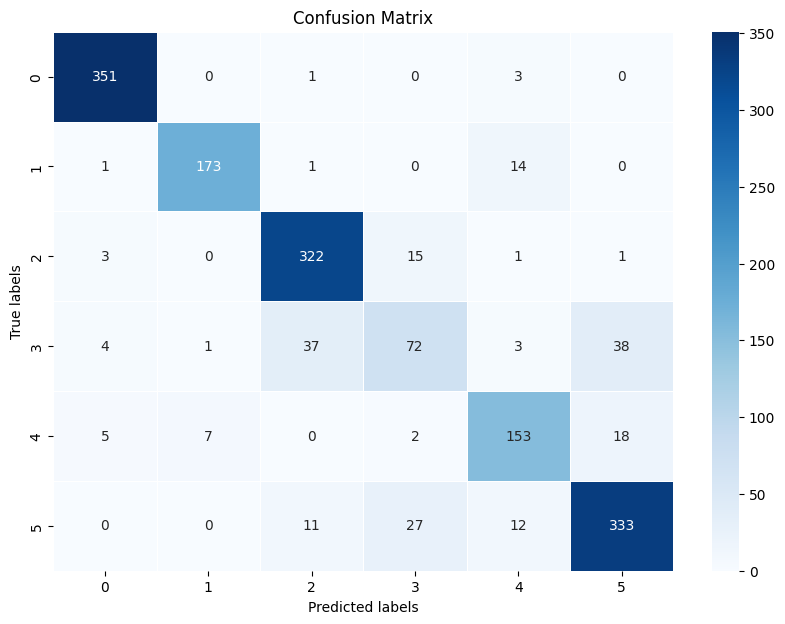

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

print_evaluation_metrics(y_test, y_pred)

plot_confusion_matrix(y_test, y_pred)


### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part.

Balanced Accuracy: 0.8678617390048845
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       355
         2.0       0.97      0.96      0.96       189
         3.0       0.86      0.95      0.91       342
         4.0       0.64      0.58      0.61       155
         5.0       0.91      0.89      0.90       185
         6.0       0.88      0.84      0.86       383

    accuracy                           0.89      1609
   macro avg       0.87      0.87      0.87      1609
weighted avg       0.89      0.89      0.89      1609



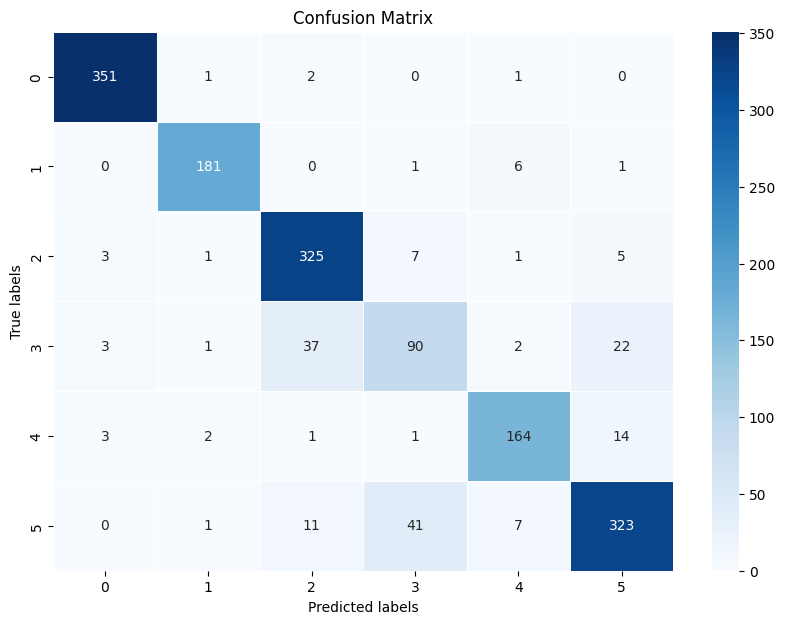

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

print_evaluation_metrics(y_test, y_pred)

plot_confusion_matrix(y_test, y_pred)

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Balanced Accuracy: 0.8191602351764184
              precision    recall  f1-score   support

         1.0       0.88      0.99      0.94       355
         2.0       0.98      0.93      0.95       189
         3.0       0.90      0.91      0.90       342
         4.0       0.48      0.60      0.53       155
         5.0       0.93      0.69      0.80       185
         6.0       0.86      0.80      0.83       383

    accuracy                           0.85      1609
   macro avg       0.84      0.82      0.82      1609
weighted avg       0.86      0.85      0.85      1609



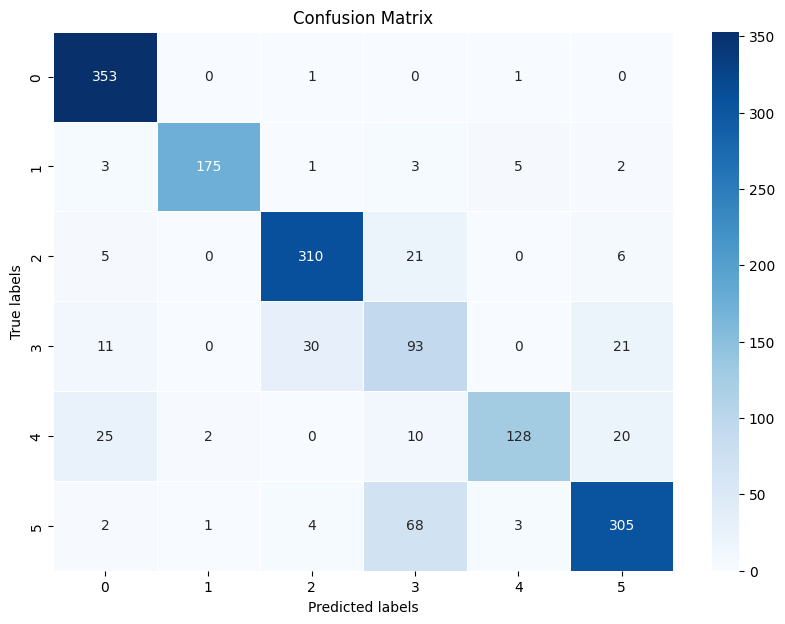

In [ ]:
svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X_train_scaled, y_train)

y_pred_poly = svc_poly.predict(X_test_scaled)

print_evaluation_metrics(y_test, y_pred_poly)
plot_confusion_matrix(y_test, y_pred_poly)

### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Balanced Accuracy: 0.678944902894234
              precision    recall  f1-score   support

         1.0       0.85      0.83      0.84       355
         2.0       0.82      0.83      0.82       189
         3.0       0.81      0.89      0.85       342
         4.0       0.31      0.32      0.32       155
         5.0       0.44      0.52      0.48       185
         6.0       0.83      0.69      0.75       383

    accuracy                           0.72      1609
   macro avg       0.68      0.68      0.68      1609
weighted avg       0.73      0.72      0.73      1609



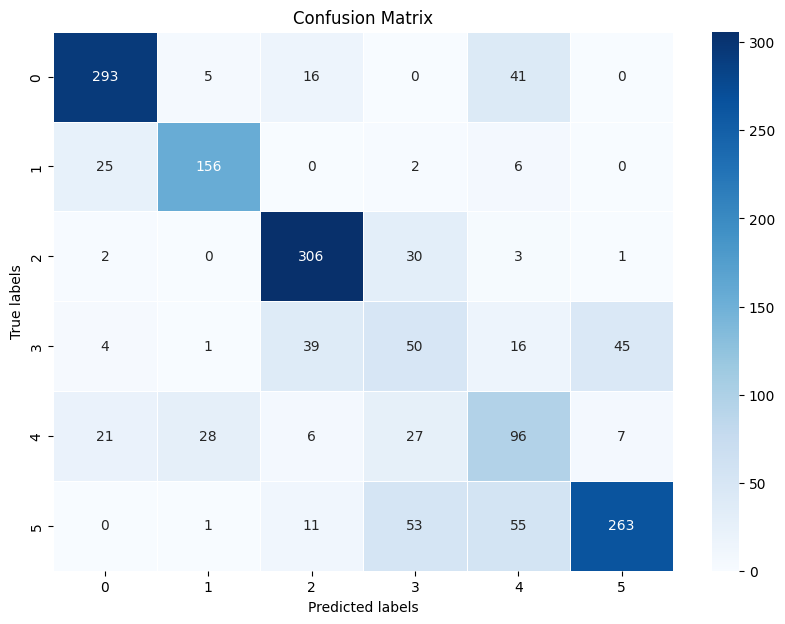

In [ ]:
svc_sigmoid = SVC(kernel='sigmoid', gamma='scale', coef0=0)
svc_sigmoid.fit(X_train_scaled, y_train)

y_pred_sigmoid = svc_sigmoid.predict(X_test_scaled)

print_evaluation_metrics(y_test, y_pred_sigmoid)

plot_confusion_matrix(y_test, y_pred_sigmoid)


Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one?

**Best Overall**: The Gaussian RBF kernel is the top performer for this dataset. It provides the highest balanced and overall accuracy, making it suitable for complex datasets where capturing nonlinear relationships is crucial.

**Consistent Performer**: The linear kernel also performs well, particularly in scenarios where the data is either linearly separable or close to linear. It offers good speed and simplicity.

**Complex Relations**: The polynomial kernel can model complex relationships and might be preferable in certain types of datasets where the degree of interaction among features plays a significant role.

**Least Effective**: The sigmoid kernel showed the weakest performance on this dataset. While it might be useful in specific contexts resembling neural network activation functions, it generally does not perform well for standard SVM classifications in comparison to the other kernels.




1. Linear Kernel

Advantages:

Simplicity: It is simple and easy to implement, making it highly efficient especially for linearly separable data.

Speed: It is generally faster than other kernels because it involves fewer calculations.

Interpretability: Results are easy to interpret, which can be beneficial in understanding the impact of each feature.

Disadvantages:

Limited Flexibility: It can only be used effectively with data that is linearly separable. If the dataset has complex patterns, a linear kernel might not perform well.

2. Polynomial Kernel

Advantages:

Versatility: It can model non-linear decision boundaries, which allows it to capture more complex patterns in the data than a linear kernel.

Adjustable Complexity: The degree of the polynomial can be adjusted to control the complexity of the decision boundary.

Disadvantages:

Computational Cost: Higher degree polynomials can be computationally expensive and may lead to overfitting if not managed correctly.

Parameter Sensitivity: Choosing the right degree and coefficients can be challenging and greatly affects performance.

3. Gaussian RBF Kernel

Advantages:

High Flexibility: RBF can handle data where the relationship between class labels and features is highly non-linear.

Less Prone to Overfitting: Generally, it does not overfit as easily as the polynomial kernel.

Disadvantages:

Computational Intensity: It requires more computational resources, which can make it slower, especially with large datasets.

Parameter Sensitivity: The performance is sensitive to the setting of the gamma parameter; incorrect gamma can lead to significant overfitting or underfitting.

4. Sigmoid Kernel

Advantages:

Neural Network Analogy: It mirrors the behavior of neurons in a neural network, which can be beneficial for certain types of non-linear data.

Efficiency: It can be more efficient than RBF and polynomial kernels when tuned correctly.

Disadvantages:

Challenging Tuning: Finding the right balance of parameters is tricky and can affect the model's ability to generalize.

Risk of Non-PSD (Positive Semi-Definite) Matrix: In some cases, the sigmoid kernel may not maintain the properties required for the SVM algorithm to converge, leading to poor performance.